<a href="https://colab.research.google.com/github/anushka1947/Machine-Learning/blob/main/Flight_Data_Recorder_Analysis_Using_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
df= files.upload()

Saving synthetic_flight_data.csv to synthetic_flight_data.csv


In [ ]:
df=pd.read_csv('synthetic_flight_data.csv')
df.head()

,time,altitude,airspeed,vertical_speed,engine_temperature,fuel_flow,pitch,roll,anomaly
0,0,35248.357077,486.430105,174.143124,540.582841,4.528142,0.491031,0.394189,0
1,1,34930.867849,493.890011,141.661796,568.350431,6.012702,-0.320541,2.814487,0
2,2,35323.844269,488.052379,-468.259923,582.389148,4.801813,4.758954,1.705510,0
3,3,35761.514928,502.208361,289.792111,604.490067,5.090569,7.664156,-6.389571,0
4,4,34882.923313,523.943571,-745.041338,630.724870,5.717391,3.434235,-0.931102,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                10000 non-null  int64  
 1   altitude            10000 non-null  float64
 2   airspeed            10000 non-null  float64
 3   vertical_speed      10000 non-null  float64
 4   engine_temperature  10000 non-null  float64
 5   fuel_flow           10000 non-null  float64
 6   pitch               10000 non-null  float64
 7   roll                10000 non-null  float64
 8   anomaly             10000 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 703.3 KB
None


In [ ]:
print(df.isnull().sum())

time                  0
altitude              0
airspeed              0
vertical_speed        0
engine_temperature    0
fuel_flow             0
pitch                 0
roll                  0
anomaly               0
dtype: int64


Data Exploration

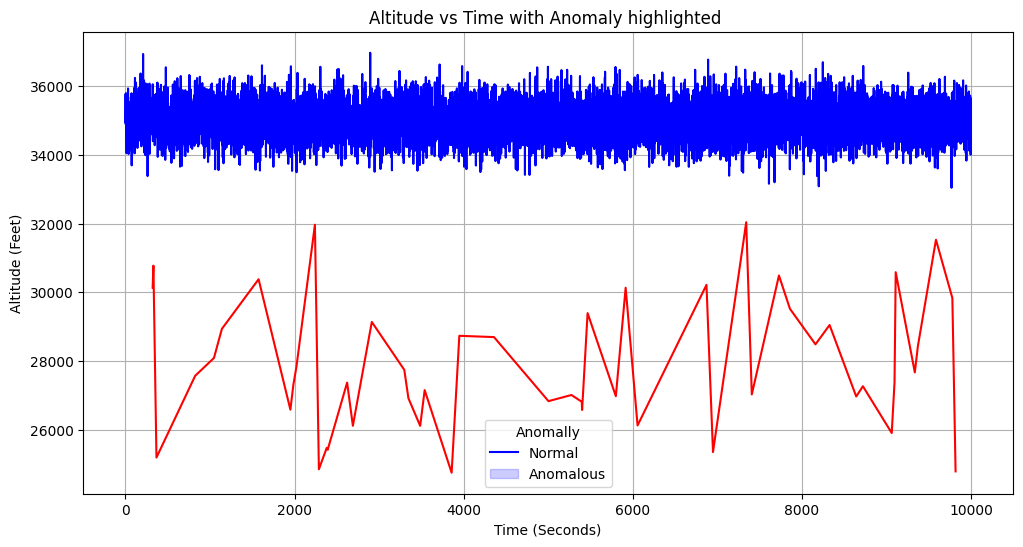

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df["time"], y=df["altitude"], hue=df["anomaly"], palette={0: "blue", 1: "red"})
plt.xlabel("Time (Seconds)")
plt.ylabel('Altitude (Feet)')
plt.title('Altitude vs Time with Anomaly highlighted ')
plt.legend(title='Anomally',labels=['Normal','Anomalous'])
plt.grid(True)
plt.show()

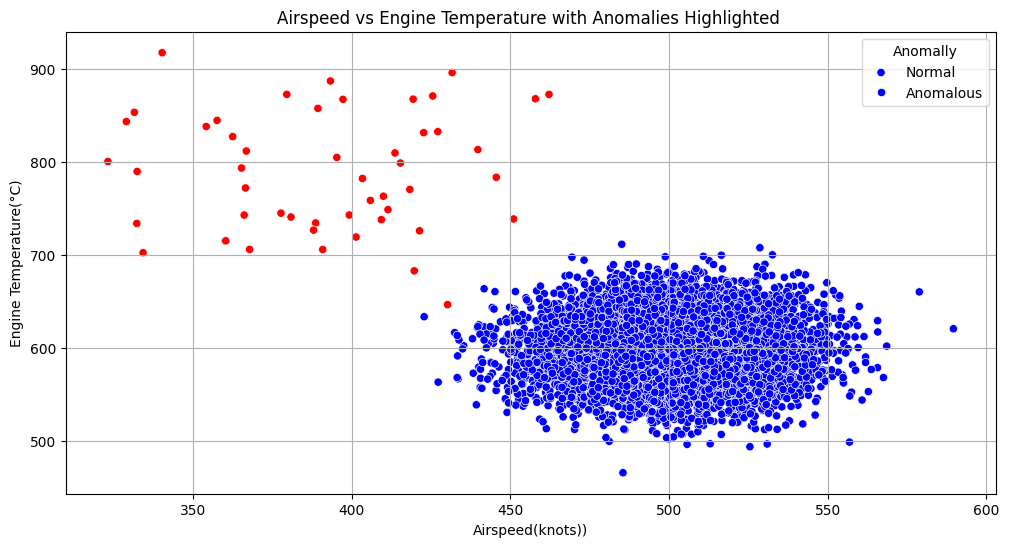

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["airspeed"], y=df["engine_temperature"], hue=df["anomaly"], palette={0: "blue", 1: "red"})
plt.xlabel("Airspeed(knots))")
plt.ylabel('Engine Temperature(°C)')
plt.title('Airspeed vs Engine Temperature with Anomalies Highlighted ')
plt.legend(title='Anomally',labels=['Normal','Anomalous'])
plt.grid(True)
plt.show()

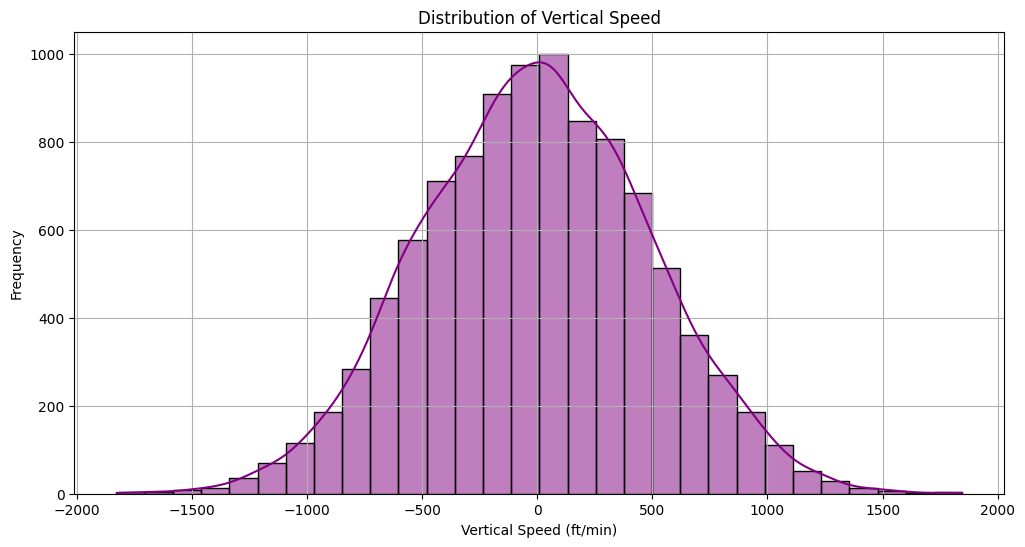

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df["vertical_speed"], bins=30, kde=True, color='purple')
plt.xlabel("Vertical Speed (ft/min)")
plt.ylabel("Frequency")
plt.title("Distribution of Vertical Speed")
plt.grid(True)
plt.show()

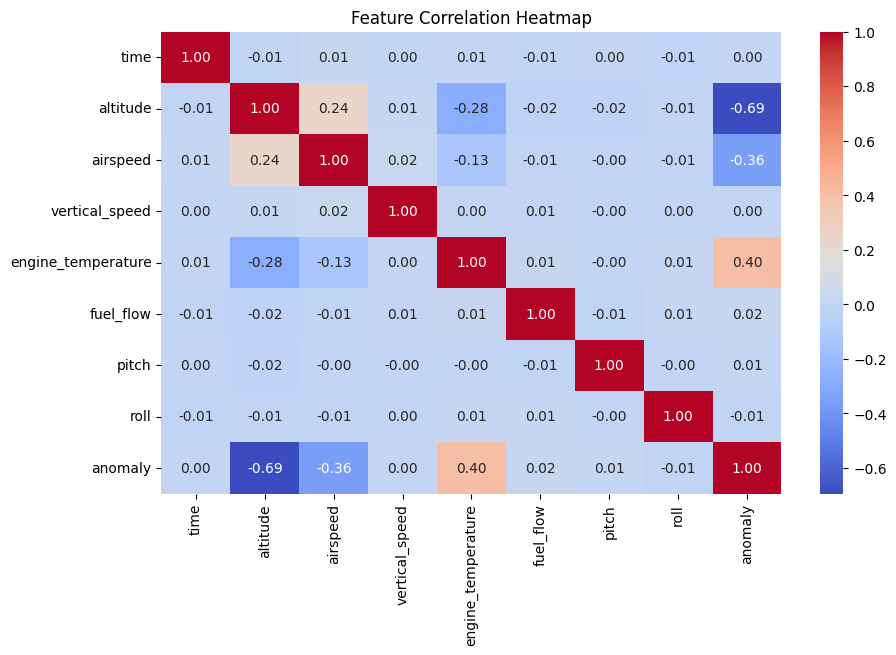

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df.drop(columns=['time','anomaly']))

In [ ]:
iso_forest=IsolationForest(contamination=0.05,random_state=42)
df['iso_forest_anomaly']=iso_forest.fit_predict(df_scaled)
df['iso_forest_anomaly']=df['iso_forest_anomaly'].map({1:0,-1:1})


In [ ]:
input_dim=df_scaled.shape[1]
autoencoder=keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(input_dim,)), # Added a comma to make it a tuple
    layers.Dense(8,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(input_dim,activation='sigmoid')
])
autoencoder.compile(optimizer='adam',loss='mse')
autoencoder.fit(df_scaled,df_scaled,epochs=20,batch_size=32,shuffle=True)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0184
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0092
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0063
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0032
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 13/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0011
Epoch 14/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011
Epoch 15/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

Model Evaluation

In [ ]:
reconstructions = autoencoder.predict(df_scaled)
mse = np.mean(np.abs(reconstructions - df_scaled), axis=1)
thresh = np.percentile(mse, 95)
df["autoencoder_anomaly"] = (mse > thresh).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print("\nAnomaly Detection Results:")
print(df[['anomaly','iso_forest_anomaly','autoencoder_anomaly']].value_counts())


Anomaly Detection Results:
anomaly  iso_forest_anomaly  autoencoder_anomaly
0        0                   0                      9163
                             1                       337
         1                   0                       331
                             1                       119
1        1                   1                        44
                             0                         6
Name: count, dtype: int64


Real-time Anomaly Detection Simulation

In [ ]:
def detect_anomalies(new_data):
    new_data_scaled = scaler.transform([new_data])
    mse = np.mean(np.abs(autoencoder.predict(new_data_scaled) - new_data_scaled))
    return mse > thresh

In [ ]:
def detect_anomalies(new_data):
    new_data_scaled = scaler.transform([new_data])
    mse = np.mean(np.abs(autoencoder.predict(new_data_scaled) - new_data_scaled))
    return mse > thresh